#### Paquetes necesarios

In [85]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### Selección de imagen y aplicación del operador Sobel

(1502, 1502)


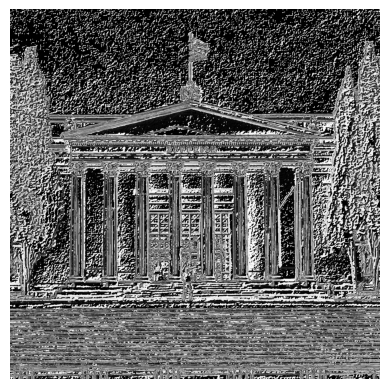

In [86]:
# Lee imagen de archivo
img = cv2.imread('Images/grecia.jpg') 

# Conversión de la imagen a escala de grises desde BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Filtro Gaussiano para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (9, 9), 0)

# Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Conversión a 8 bits
sobel8 = np.uint8(sobel)

print(sobel8.shape)

# Muestra la imagen
plt.figure()
plt.axis("off")
plt.imshow(sobel8, cmap="gray")
plt.show()

#### Histograma de la imagen para obtener umbral

(0.0, 256.0)

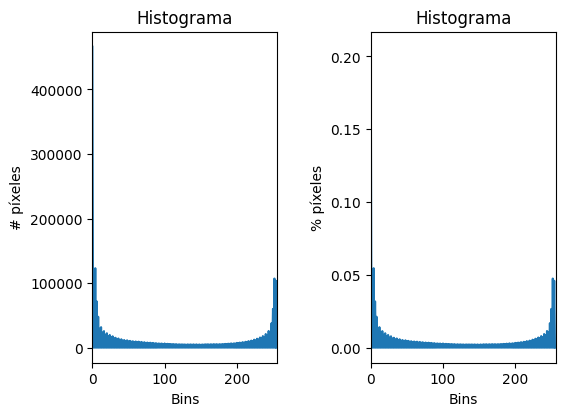

In [87]:
# Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([sobel8], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

# Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) # Separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

(1502, 1502)


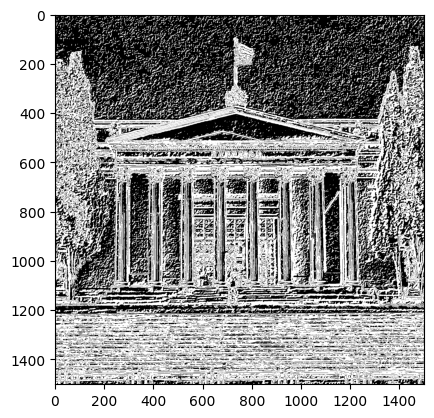

In [90]:
# Define valor umbral
valorUmbral = 40 

# Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

print(imagenUmbralizada.shape)

# Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

#### Conteo por columnas

(0.0, 1502.0)

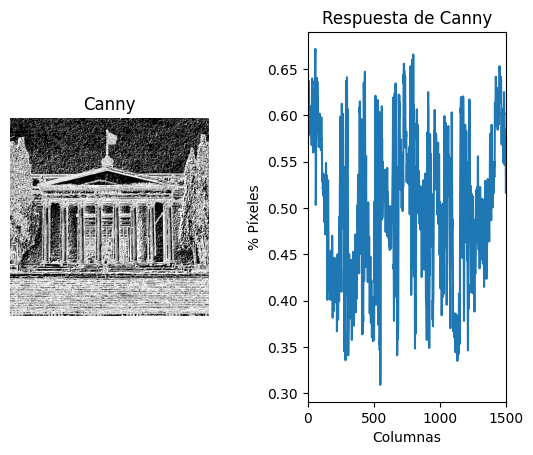

In [91]:
# El contenido de la imagen Canny son valores 0 o 255
# Contamos el número de píxeles blancos (255) por columna
# Suma los valores de los píxeles por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de filas y al valor máximo del píxel (255)
cols = cols = col_counts[0] / (255 * imagenUmbralizada.shape[0])

# Mostramos las gráficas resultantes
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(imagenUmbralizada, cmap='gray') 

# Hacer espacio entre las gráficas
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% Píxeles")
plt.plot(cols)
plt.xlim([0, imagenUmbralizada.shape[1]])

#### Conteo por filas

(0.0, 1502.0)

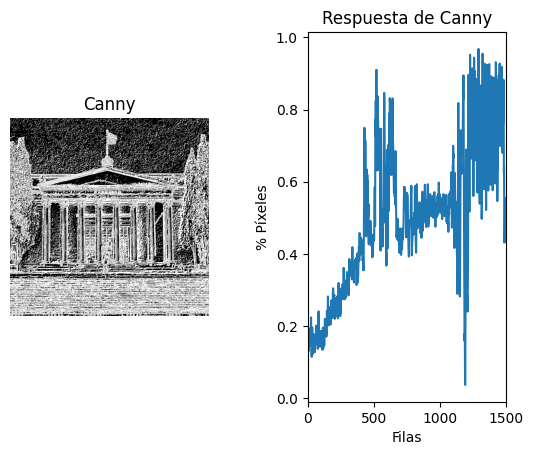

In [92]:
# Contamos el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de columnas y al valor máximo del píxel (255)
rows = row_counts[:,0] / (255 * imagenUmbralizada.shape[1])

# Mostramos las gráficas resultantes
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(imagenUmbralizada, cmap='gray') 

# Hacer espacio entre las gráficas
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% Píxeles")
plt.plot(rows)
plt.xlim([0, imagenUmbralizada.shape[0]])

#### Valores máximos por columnas y filas

In [94]:
# Valor máximo alcanzado en las columnas
max_col_val = np.max(cols)

# Posición del valor máximo en las columnas
max_col_pos = np.argmax(cols)

# Valor máximo alcanzado en las filas
max_row_val = np.max(rows)

# Posición del valor máximo en las filas
max_row_pos = np.argmax(rows)

# Mostramos los resultados por pantalla
print("--------------------------------------------------------------")
print("[+] El valor máximo alcanzado en las columnas es: {}".format(max_col_val))
print("[+] Columna con valor máximo: {}\n".format(max_col_pos))

print("[-] El valor máximo alcanzado en las filas es: {}".format(max_row_val))
print("[-] Fila con valor máximo: {}".format(max_row_pos))
print("--------------------------------------------------------------")

--------------------------------------------------------------
[+] El valor máximo alcanzado en las columnas es: 0.6717709720372836
[+] Columna con valor máximo: 59

[-] El valor máximo alcanzado en las filas es: 0.9680426098535286
[-] Fila con valor máximo: 1294
--------------------------------------------------------------


#### Columnas y filas por encima del (0.95 * máximo) en cada caso

In [95]:
# Número de valores que superan el 0.95 * Máximo en las columnas
num_cols = np.sum(cols > 0.95 * max_col_val)

# Valores que superan el 0.95 * Máximo en las columnas
cols_95 = cols[cols > 0.95 * max_col_val]

# Columnas en las que se encuentran los valores que superan el 0.95 * Máximo
cols_95_pos = np.where(cols > 0.95 * max_col_val)

# Número de valores que superan el 0.95 * Máximo en las filas
num_rows = np.sum(rows > 0.95 * max_row_val)

# Valores que superan el 0.95 * Máximo en las filas
rows_95 = rows[rows > 0.95 * max_row_val]

# Filas en las que se encuentran los valores que superan el 0.95 * Máximo
rows_95_pos = np.where(rows > 0.95 * max_row_val)

# Mostramos los resultados por pantalla
print("------------------------------------------------------------------------")
print("[+] Número de valores que superan el (0.95 * Máximo) en las columnas: {}\n".format(num_cols))
#print("[+] Valores que superan el (0.95 * Máximo) en las columnas: {}\n".format(cols_95))
#print("[+] Columnas en las que se encuentran los valores que superan el (0.95 * Máximo): {}\n".format(cols_95_pos))

print("[-] Número de valores que superan el (0.95 * Máximo) en las filas: {}".format(num_rows))
#print("[-] Valores que superan el (0.95 * Máximo) en las filas: {}".format(rows_95))
#print("[-] Filas en las que se encuentran los valores que superan el (0.95 * Máximo): {}".format(rows_95_pos))
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
[+] Número de valores que superan el (0.95 * Máximo) en las columnas: 30

[-] Número de valores que superan el (0.95 * Máximo) en las filas: 11
------------------------------------------------------------------------


#### Visualización de columnas por encima del (0.95 * máximo)

Posiciones de las columnas que superan el porcentaje:
 [  34   56   57   58   59   71  298  432  433  434  727  729  730  732
  733  738  778  779  780  793  794  800 1425 1451 1452 1453 1454 1455
 1462 1464]


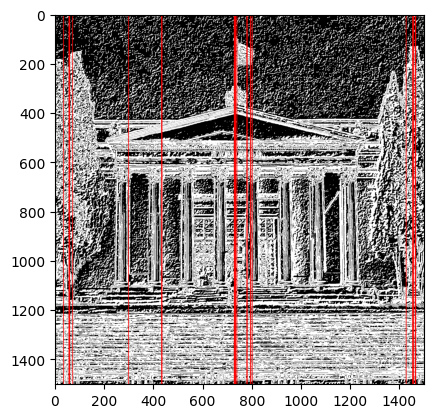

In [96]:
# Copia la imagen umbralizada en color para no modificar la original
columnas_remarcadas = cv2.cvtColor(imagenUmbralizada, cv2.COLOR_GRAY2BGR)

# Lista con índices de las columnas que superan el 0.95 * Máximo
cols_index = cols_95_pos[0]

print("Posiciones de las columnas que superan el porcentaje:\n {}".format(cols_index))

for pos in cols_index:
    # Dibuja la línea en la imagen en color
    cv2.line(columnas_remarcadas, (pos, 0), (pos, 1502), (0, 0, 255), thickness=2)

# Muestra la imagen umbralizada resultante con la línea roja
plt.figure()
plt.imshow(cv2.cvtColor(columnas_remarcadas, cv2.COLOR_BGR2RGB))
plt.show()


#### Visualización de filas por encima del (0.95 * máximo)

Posiciones de las filas que superan el porcentaje:
 [1230 1260 1261 1292 1294 1325 1341 1358 1375 1425 1454]


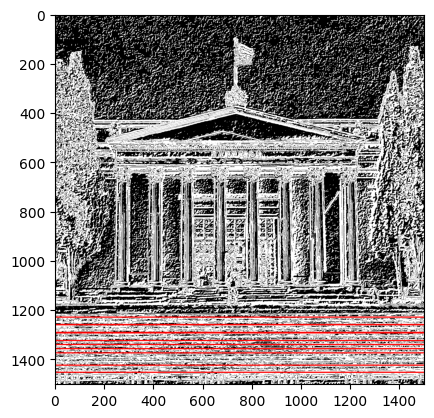

In [97]:
# Copia la imagen umbralizada en color para no modificar la original
filas_remarcadas = cv2.cvtColor(imagenUmbralizada, cv2.COLOR_GRAY2BGR)

# Lista con índices de las columnas que superan el 0.95 * Máximo
row_index = rows_95_pos[0]

print("Posiciones de las filas que superan el porcentaje:\n {}".format(row_index))

for pos in row_index:
    # Dibuja la línea en la imagen en color
    cv2.line(filas_remarcadas, (0, pos), (1502, pos), (0, 0, 255), thickness=4)

# Muestra la imagen umbralizada resultante con la línea roja
plt.figure()
plt.imshow(cv2.cvtColor(filas_remarcadas, cv2.COLOR_BGR2RGB))
plt.show()